In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("Data SAT GPA.csv")

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


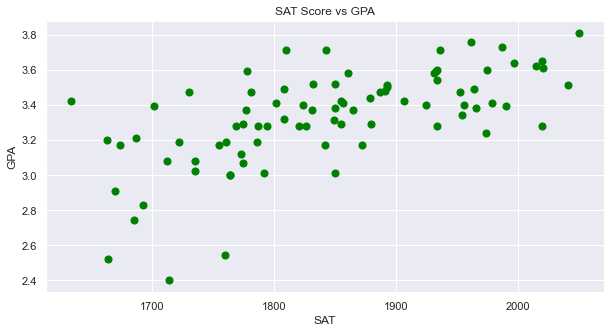

In [29]:
plt.figure(figsize=(10,5))
plt.title("SAT Score vs GPA")
plt.xlabel("SAT", fontsize = 12)
plt.ylabel("GPA", fontsize = 12)
plt.scatter(data.SAT, data.GPA, s = 50, color = "green")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = b0 + b1x1

In [7]:
X = data.iloc[:, :1].values
y = data.iloc[:,-1].values

In [12]:
X_train, X_test, y_train, y_test \
= train_test_split(X,y, test_size=0.10, train_size=0.90, random_state=0)

In [14]:
data.head() # SAT : independent , GPA: Dependent

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [19]:
print(f"X_train {X_train.shape} \nX_test {X_test.shape} \n\
y_train {y_train.shape} \ny_test {y_test.shape}")

X_train (75, 1) 
X_test (9, 1) 
y_train (75,) 
y_test (9,)


In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
print(f"Coefficients : {model.coef_}")
print(f"intercept : {model.intercept_}")

Coefficients : [0.00174641]
intercept : 0.10038821971624712


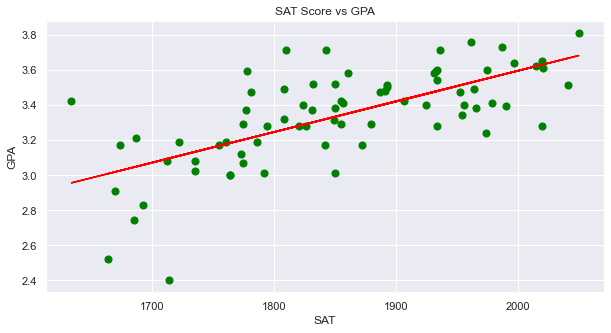

In [31]:
plt.figure(figsize=(10,5))
plt.title("SAT Score vs GPA")
plt.xlabel("SAT", fontsize = 12)
plt.ylabel("GPA", fontsize = 12)
plt.scatter(X_train, y_train, s = 50, color = "green")
plt.plot(X_train, model.predict(X_train), color = "red")
plt.show()

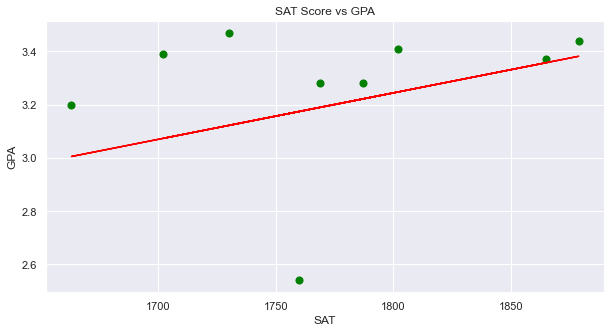

In [32]:
plt.figure(figsize=(10,5))
plt.title("SAT Score vs GPA")
plt.xlabel("SAT", fontsize = 12)
plt.ylabel("GPA", fontsize = 12)
plt.scatter(X_test, y_test, s = 50, color = "green")
plt.plot(X_test, model.predict(X_test), color = "red")
plt.show()

In [36]:
y_pred = np.round(model.predict(X_test), decimals = 2)
y_pred

array([3.19, 3.36, 3.07, 3.25, 3.  , 3.38, 3.17, 3.12, 3.22])

In [39]:
pd.DataFrame({"SAT":X_test[:,0],"Actual GPA":y_test,"Predicted GPA":y_pred})

,SAT,Actual GPA,Predicted GPA
0,1769,3.28,3.19
1,1865,3.37,3.36
2,1702,3.39,3.07
3,1802,3.41,3.25
4,1663,3.20,3.00
5,1879,3.44,3.38
6,1760,2.54,3.17
7,1730,3.47,3.12
8,1787,3.28,3.22


In [41]:
print(f"MAE: {metrics.mean_absolute_error(y_test,y_pred)}")

MAE: 0.20888888888888893


In [42]:
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

RMSE: 0.2794438922017959
